## 13_Model_Exploration

Author: Daniel Hui

License: MIT

This notebook exaluates a few different modelling options for the data, for comparison

In [16]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Global Variables
These names correspond to different data sets and targets. Comment them in/out to test different target ranges

In [17]:
target_range = "18_Half"

### Load Dataset

In [18]:
checkout_target_df = pd.read_csv(f'../01_Data/07_Merged_Target_Feature_Data/{target_range}_set.csv',index_col=0)

In [19]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
0,3177276,0,1,0,2016,0,0,1,0,0,0,0,0,0,0,0,14,45,78,94,17,18,0,1,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1
1,395432,0,1,1,1985,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,123754,1,1,0,1945,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
count,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000,397147.0000
mean,2234258.6919,0.4945,0.9982,0.8704,1983.6751,0.2787,0.0825,0.6330,0.0375,0.0212,0.0386,0.1546,0.0472,0.0240,0.0191,0.0320,0.7237,2.3485,4.8724,9.6092,2.4991,2.8845,0.1122,0.0724,0.0847,0.0708,0.8960,0.0652,0.0327,0.0950,0.0347,0.0525,0.1073,0.0404,0.0234,0.1006,0.0491,0.0200,0.0331,0.1286,0.0692,0.0249,0.0464,0.0653,0.0317,0.1011,0.0575,0.0150,0.0691
std,953967.6490,0.5000,0.0423,0.3359,189.6728,0.4484,0.2751,0.4820,0.1899,0.1439,0.1927,0.3616,0.2121,0.1531,0.1368,0.1760,5.1280,12.2969,20.5221,34.4055,3.0947,4.7797,0.3156,0.2591,0.2785,0.2565,0.3053,0.2469,0.1778,0.2933,0.1830,0.2231,0.3095,0.1970,0.1510,0.3008,0.2161,0.1401,0.1789,0.3348,0.2537,0.1560,0.2104,0.2471,0.1752,0.3015,0.2327,0.1214,0.2537
min,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1848333.5000,0.0000,1.0000,1.0000,1996.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2554562.0000,0.0000,1.0000,1.0000,2007.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2957797.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,7.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,3343666.0000,1.0000,1.0000,1.0000,2022.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,585.0000,1436.0000,1613.0000,2621.0000,27.0000,290.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [21]:
checkout_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397147 entries, 0 to 397146
Data columns (total 49 columns):
BibNum         397147 non-null int64
Checkout       397147 non-null int64
Title          397147 non-null int64
ISBN           397147 non-null int64
Year           397147 non-null int64
Fiction        397147 non-null int64
Language       397147 non-null int64
Nonfiction     397147 non-null int64
Biography      397147 non-null int64
Large Print    397147 non-null int64
Picture        397147 non-null int64
Children       397147 non-null int64
Teen           397147 non-null int64
Mystery        397147 non-null int64
AfAm           397147 non-null int64
Comic          397147 non-null int64
30 Days        397147 non-null int64
90 Days        397147 non-null int64
180 Days       397147 non-null int64
365 Days       397147 non-null int64
Branches       397147 non-null int64
Copies         397147 non-null int64
bal            397147 non-null int64
bea            397147 non-null int64
b

In [22]:
len(checkout_target_df)

397147

### Train / Test / Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [27]:
y = checkout_target_df["Checkout"]
X = checkout_target_df.drop(["Checkout","BibNum"],axis=1)

#hold out portion of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) #keep at 20 to be consistent

#hold out 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=50) 

In [28]:
print(len(X_train),len(X_val),len(X_test))

238287 79430 79430


### Baseline Preduction
Predict if a book was checked out in the same time period last year, that it will be checked out again this time period this year

In [30]:
y_pred = (X_val["365 Days"] - X_val["180 Days"]).apply(lambda x: int(x==0))

In [31]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred))
print("Precision: ",metrics.precision_score(y_val, y_pred))
print("Recall: ",metrics.recall_score(y_val, y_pred))
print("F1: ",metrics.f1_score(y_val, y_pred))

Accuracy:  0.7452725670401611
Precision:  0.7496264842337029
Recall:  0.7280804480651731
F1:  0.7386963877516758


In [32]:
confusion_matrix(y_val, y_pred)

array([[30598,  9552],
       [10681, 28599]])

### KNN Classifier
This first part will grid search for the best Neighbor value

In [134]:
for i in range(5,31,5):
    adjacents = i
    knn = KNeighborsClassifier(n_neighbors=adjacents)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    print(adjacents, " neighbors. Accuracy: ", metrics.accuracy_score(y_val, y_pred))
    print(adjacents, " neighbors. Precision: ", metrics.precision_score(y_val, y_pred))
    print(adjacents, " neighbors. Recall: ", metrics.recall_score(y_val, y_pred))
    print(adjacents, " neighbors. f1: ", metrics.f1_score(y_val, y_pred))     

5  neighbors. Accuracy:  0.7849678962608586
5  neighbors. Precision:  0.7643864329268293
5  neighbors. Recall:  0.8170061099796334
5  neighbors. f1:  0.789820830872219
10  neighbors. Accuracy:  0.7953669898023417
10  neighbors. Precision:  0.7852152801862954
10  neighbors. Recall:  0.8069246435845214
10  neighbors. f1:  0.7959219546493234
15  neighbors. Accuracy:  0.8007931512023165
15  neighbors. Precision:  0.7731305745092103
15  neighbors. Recall:  0.8451883910386966
15  neighbors. f1:  0.8075552474428673
20  neighbors. Accuracy:  0.8048722145285157
20  neighbors. Precision:  0.7819725390689843
20  neighbors. Recall:  0.8394857433808554
20  neighbors. f1:  0.80970914314479
25  neighbors. Accuracy:  0.8071635402240966
25  neighbors. Precision:  0.7749500883493586
25  neighbors. Recall:  0.859725050916497
25  neighbors. f1:  0.8151393364471319
30  neighbors. Accuracy:  0.8076545385874355
30  neighbors. Precision:  0.7800308008213552
30  neighbors. Recall:  0.8510437881873727
30  neigh

In [137]:
# Let's go with N=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [138]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred))
print("Precision: ",metrics.precision_score(y_val, y_pred))
print("Recall: ",metrics.recall_score(y_val, y_pred))
print("F1: ",metrics.f1_score(y_val, y_pred))

Accuracy:  0.8007931512023165
Precision:  0.7731305745092103
Recall:  0.8451883910386966
F1:  0.8075552474428673


In [140]:
confusion_matrix(y_val, y_pred)

array([[30408,  9742],
       [ 6081, 33199]])

### Logistic Regression

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [34]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
lr_model = LogisticRegression(C=10000)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
X_val_scaled = std_scale.transform(X_val)
y_val_pred = lr_model.predict(X_val_scaled)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [37]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_val_pred))
print("Precision: ",metrics.precision_score(y_val, y_val_pred))
print("Recall: ",metrics.recall_score(y_val, y_val_pred))
print("F1: ",metrics.f1_score(y_val, y_val_pred))

Accuracy:  0.8043434470603047
Precision:  0.7565213632728923
Recall:  0.8911659877800407
F1:  0.8183422753679092


In [38]:
confusion_matrix(y_val, y_val_pred)

array([[28884, 11266],
       [ 4275, 35005]])

In [39]:
coefficients = lr_model.coef_[0] * -1
features = np.array(X_train.columns)

In [40]:
lr_model_dict = list(zip(features,coefficients))

<BarContainer object of 47 artists>

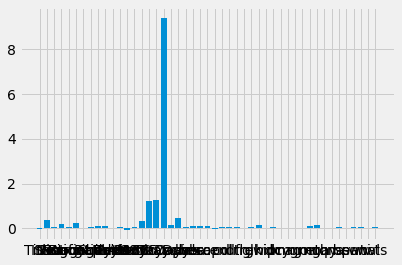

In [41]:
plt.bar(features,coefficients)

In [42]:
pd.DataFrame(lr_model_dict).sort_values(by=1,ascending=False).head(10)

,0,1
17,365 Days,9.4150
16,180 Days,1.2802
15,90 Days,1.2277
19,Copies,0.4745
1,ISBN,0.3547
14,30 Days,0.3374
5,Nonfiction,0.2405
3,Fiction,0.1807
30,gwd,0.1522
38,nga,0.1425


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Logistic Regression Model best F1 score 0.922 at prob decision threshold >= 0.850


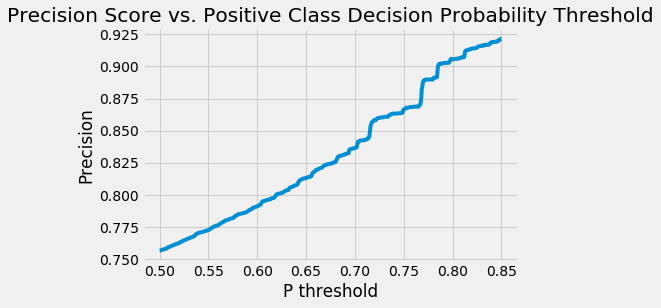

In [43]:
X_val_scaled = std_scale.transform(X_val)

thresh_ps = np.linspace(.50,.85,1000)
model_val_probs = lr_model.predict_proba(X_val_scaled)[:,1]   # first column is the probability for 0 condition
                                                              # second column is the probability for the 1 condition
precision_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    precision_scores.append(precision_score(y_val,model_val_labels))
    
plt.plot(thresh_ps, precision_scores)
plt.title('Precision Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('Precision')

best_precision_score = np.max(precision_scores) 
best_thresh_p = thresh_ps[np.argmax(precision_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_precision_score, best_thresh_p)) 


### Naive Bayes

In [50]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [51]:
model = naive_bayes.GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
y_val_predict = model.predict(X_val)

In [55]:
print("Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Recall: ",recall_score(y_val,y_val_predict))         # Recall
print("Precision: ",precision_score(y_val,y_val_predict))   # Precision
print("f1: ",f1_score(y_val,y_val_predict))  

Accuracy:  0.7622560745310336
Recall:  0.8995162932790224
Precision:  0.7028645315297394
f1:  0.7891233947515354


In [56]:
confusion_matrix(y_train, model.predict(X_train) )

array([[ 75468,  45026],
       [ 11695, 106098]])

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [70]:
# Try with different max features
rfmodel = RandomForestClassifier(n_estimators = 1000, max_features = 6,
                                min_samples_leaf = 4, n_jobs=4)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
y_val_predict = rfmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict))  

Accuracy:  0.8117839607201309
Recall:  0.8458248472505092
Precision:  0.7888313785080013
f1:  0.8163345536745374


In [72]:
confusion_matrix(y_val, y_val_predict)

array([[31256,  8894],
       [ 6056, 33224]])

### GradientBoostingClassifier

In [83]:
# Try with different max features
gbmodel = GradientBoostingClassifier(n_estimators = 1000, max_features = 6,
                                min_samples_leaf = 10)
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [84]:
y_train_predict = gbmodel.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.8127132407558952
Train Recall:  0.8538877522433421
Train Precision:  0.7858030140860476
Train f1:  0.8184318448118736


In [85]:
y_val_predict = gbmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.8119350371396198
Validation Recall:  0.8514765784114053
Validation Precision:  0.7860399529964748
Validation f1:  0.8174508126603935


In [63]:
confusion_matrix(y_val, y_val_predict)

array([[31057,  9093],
       [ 5817, 33463]])

### XGBoost Classifier

In [87]:
import xgboost as xgb

In [105]:
gbm = xgb.XGBClassifier( 
                        n_estimators=40000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

# accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [106]:
y_train_predict = fit_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.8107618124362639
Train Recall:  0.8522068374181827
Train Precision:  0.7838335884061592
Train f1:  0.816591488686697


In [107]:
y_val_predict = fit_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.8121112929623568
Validation Recall:  0.852927698574338
Validation Precision:  0.7855334114888628
Validation f1:  0.8178445014036373


In [104]:
confusion_matrix(y_val, y_val_predict)

array([[31014,  9136],
       [ 5784, 33496]])

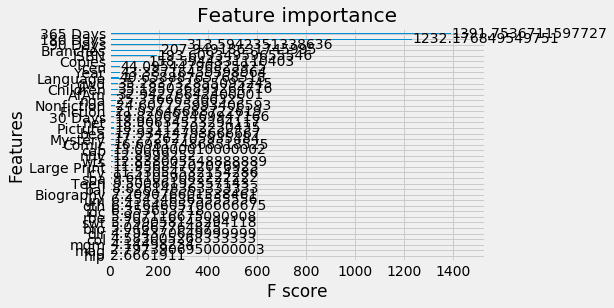

In [108]:
xgb.plot_importance(gbm, importance_type='gain')